# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [ ]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

--2023-03-09 06:27:48--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M   126MB/s    in 0.2s    

2023-03-09 06:27:49 (126 MB/s) - ‘train.csv’ saved [29470338/29470338]



,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [ ]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
##TODO print the first sentence of the first document in your sample
dfs['processed'] = dfs['text'].apply(lambda x: nlp(x))
print(list(dfs.iloc[0]["processed"].sents)[0])

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Dutch arrest man suspected of aiding Saddam war crimes, genocide (AFP) AFP - The Dutch police said they had arrested a man suspected of aiding former Iraqi leader Saddam Hussein in committing war crimes and genocide by supplying him with the materials to make chemical weapons used in attacks in the 1980s.


In [ ]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct), stopwords (x.is_stop), and digits (x.is_digit)
dfs['meaningful_toks'] = dfs['processed'].apply(lambda doc: [w.lemma_.lower() for w in doc if not w.is_stop and not w.is_punct and not w.is_digit])
##TODO print the tokens (x.lemma_) and the dependency labels (x.dep_ ) of the first sentence of the first document (doc.sents)
first_sent_doc = list(dfs.iloc[0]["processed"].sents)[0]
for tok in first_sent_doc:
  print(tok.lemma_, tok.dep_)

dutch amod
arrest compound
man nsubj
suspect acl
of prep
aid pcomp
Saddam compound
war compound
crime dobj
, punct
genocide conj
( punct
AFP appos
) punct
AFP nmod
- punct
the det
dutch amod
police nsubj
say ROOT
they nsubj
have aux
arrest ccomp
a det
man dobj
suspect acl
of prep
aid pcomp
former amod
iraqi amod
leader compound
Saddam compound
Hussein dobj
in prep
commit pcomp
war compound
crime dobj
and cc
genocide conj
by prep
supply pcomp
he dobj
with prep
the det
material pobj
to aux
make advcl
chemical amod
weapon nsubj
use ccomp
in prep
attack pobj
in prep
the det
1980s pobj
. punct


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [ ]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

num_capitalized, n = 0, 0
for doc in dfs["processed"]:
    for entity in doc.ents:
        tokens = entity.text.split(' ')
        for tok in tokens:
          if tok[0].isupper():
            num_capitalized += 1
          n += 1
print(num_capitalized / n)

0.7


In [ ]:
##TODO print the ratio of capitalized tokens not being part of a named entity span (have no token.ent_type_)
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized

num_capitalized, n = 0, 0

for doc in dfs["processed"]:
    for token in doc:
        if not token.ent_type_:
            if token.text[0].isupper():
                num_capitalized += 1
            n += 1
print(num_capitalized / n)

0.13352112676056338


In [ ]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

num_capitalized, n = 0, 0


for doc in dfs["processed"]:
    for sent in doc.sents:
        for i, token in enumerate(sent):
            if i == 0:
                continue
            if not token.ent_type_:
                if token.text[0].isupper():
                    num_capitalized += 1
                    error_analysis = sent # keep one sentence where we have a capitalized token which is not the start of the sentence
                    
                n += 1
print(num_capitalized / n)

0.09808612440191387


Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

In [ ]:
print(error_analysis)
print([(t, t.ent_type_) for t in error_analysis])

Winter Fuel Woes
[(Winter, ''), (Fuel, ''), (Woes, '')]


## Term Frequencies

(17, 594)


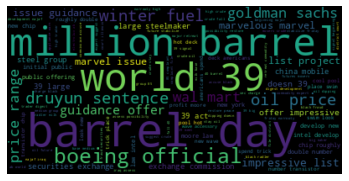

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2)) # create features for both 1 and 2-grams

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for label == business using tfidf frequencies
dfs["input_TFIDF"] = dfs["meaningful_toks"].apply(lambda x: " ".join(x))
X_business_tfidf = tfidf.fit_transform(dfs.loc[dfs['label'] == 'business', "input_TFIDF"])
print(X_business_tfidf.shape)

vocab = tfidf.get_feature_names_out()
bigrams = [v for v in vocab if len(v.split(' ')) == 2]

import numpy as np
total_freqs = list(np.array(X_business_tfidf.mean(axis=0))[0])
fdict = {v: freq for v, freq in zip(vocab,total_freqs) if v in bigrams}
# generate word cloud of words with the highest tfidf frequencies
wordcloud = WordCloud().generate_from_frequencies(fdict) 
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

## Supervised Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

##TODO compute the number of words per document (excluding stopwords)
##TODO get the most predictive features of the number of words per document using first f_class and then chi2
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=0.01, 
              max_df=0.9,  
              max_features=1000,
              stop_words='english',
              ngram_range=(1,2)) # create features for both 1 and 2-grams

import numpy as np
X_count = count.fit_transform(dfs["input_TFIDF"])
vocab = count.get_feature_names_out()

# f_class
Y = dfs['label']
select = SelectKBest(f_classif, k=10)
X_new = select.fit_transform(X_count, Y)
print ([vocab[i] for i in np.argsort(select.scores_)[:10]])

# chi2
select = SelectKBest(chi2, k=10)
X_new = select.fit_transform(X_count, Y)
print ([vocab[i] for i in np.argsort(select.scores_)[:10]])


['reuters', 'china', 'reuters reuters', 'open', 'thursday', 'know', 'cut', 'say saturday', 'slash', 'medium']
['reuters', 'reuters reuters', 'know', 'open', 'slash', 'month', 'reach', 'flat', 'view', 'job']


Are the results different? What could be a reason for this? 

## Huggingface Tokenizers

In [ ]:
# # we use distilbert tokenizer
# !pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer

dfs["huggingface_tokenizer"] = dfs["text"].apply(lambda x: tokenizer.tokenize(x))

##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?

tokens, types = 0, set()
for doc in dfs["huggingface_tokenizer"]:
    for token in doc:
        tokens += 1
        types.add(token)
        
print(len(types) / tokens)

##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#" T5 '_'

num_subwords = 0
for doc in dfs["huggingface_tokenizer"]:
    for token in doc:
        if token.startswith("#"):
            num_subwords += 1
            
print ("number of subwords:", num_subwords, "number of words:", tokens)

0.43268851164626926
number of subwords: 194 number of words: 2533


# Parsing

In [ ]:
import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints
df.head()

,label,title,lead,text
118105,world,Barroso Urges Turkey to Go Extra Mile on EU Talks,The European Commission president urged Turkey...,Barroso Urges Turkey to Go Extra Mile on EU Ta...
67116,world,Election Heralds Start of Endgame in UN-Run Ko...,Reuters - Kosovo's\general election on Saturda...,Election Heralds Start of Endgame in UN-Run Ko...
30159,sci/tech,Study: IT job market continues to be stagnant,"The IT job market remains tight in the U.S., w...",Study: IT job market continues to be stagnant ...
23431,world,Lawmakers Troubled by 'Ghost Detainees',WASHINGTON - Congress may keep up the focus on...,Lawmakers Troubled by 'Ghost Detainees' WASHIN...
74930,business,"Economy growing despite energy costs, Fed says",The US economy continued to grow in September ...,"Economy growing despite energy costs, Fed says..."


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
#TODO preprocess the corpus using spacy

df["preprocessed"] = df["text"].apply(lambda x: nlp(x))

### Information Extraction

In [ ]:
def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs
##TODO extract the subject-verbs pairs and print the result for the second document

pair_from_first_document = extract_subject_verb_pairs(df["preprocessed"].iloc[1])
print(pair_from_first_document)

##TODO create a list ranking the most common pairs and print the first 10 items

from collections import Counter
counter = Counter()

for text in df["preprocessed"]:
    pairs = extract_subject_verb_pairs(text)
    counter.update(pairs)
    
for item in counter.most_common(10):
    print(" -- ".join((item[0][0], item[0][1], str(item[1]))))


[('start', 'be')]
it -- be -- 286
official -- say -- 157
he -- be -- 103
company -- say -- 78
that -- be -- 73
they -- be -- 46
inc. -- say -- 43
police -- say -- 38
report -- say -- 37
what -- be -- 35


In [ ]:
##TODO do the same for verbs-object pairs ('dobj')
##TODO create a list ranking the most common pairs and print the first 10 items

def extract_dobj_verb_pairs(sent):
    dobjs = [w for w in sent if w.dep_ == "dobj"]
    pairs = [(w.head.lemma_.lower(), w.lemma_.lower()) for w in dobjs]
    return pairs

counter = Counter()
for text in df["preprocessed"]:
    pairs = extract_dobj_verb_pairs(text)
    counter.update(pairs)
    
for item in counter.most_common(10):
    print (" -- ".join((item[0][0], item[0][1], str(item[1]))))

kill -- people -- 88
pay -- million -- 34
take -- lead -- 30
take -- step -- 28
score -- point -- 28
announce -- plan -- 28
cut -- job -- 27
win -- 39;t -- 26
doesn -- 39;t -- 22
isn -- 39;t -- 22


In [ ]:
##TODO do the same for adjectives-nouns pairs ('amod')
##TODO create a list ranking the most common pairs and print the first 10 items
def extract_adjj_noun_pairs(sent):
    adjs = [w for w in sent if w.dep_ == "amod"]
    # filter for NOUN because otherwise, we get pairs such as "such as"
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in adjs if w.head.pos_ == "NOUN"]
    return pairs


counter = Counter()
for text in df["preprocessed"]:
    pairs = extract_adjj_noun_pairs(text)
    counter.update(pairs)
    
for item in counter.most_common(10):
    print (" -- ".join((item[0][0], item[0][1], str(item[1]))))

next -- year -- 142
third -- quarter -- 139
last -- week -- 120
first -- time -- 95
last -- night -- 82
presidential -- election -- 73
mobile -- phone -- 73
last -- month -- 67
last -- year -- 62
open -- source -- 54


### Exploring cross label dependencies

In [ ]:
##TODO extract all the subject-verbs and verbs-object pairs for the verb "rise"

counter_subj_verb = Counter()
counter_dobj_verb = Counter()


for text in df["preprocessed"]:
    pairs = extract_subject_verb_pairs(text)
    pairs = [pair for pair in pairs if pair[1] == "rise"]
    dobj_verb_pairs = extract_dobj_verb_pairs(text)
    dobj_verb_pairs = [pair for pair in dobj_verb_pairs if pair[0] == "rise"]
    counter_subj_verb.update(pairs)
    counter_dobj_verb.update(dobj_verb_pairs)
    
for item in counter_subj_verb.most_common(10):
    print (" -- ".join((item[0][0], item[0][1], str(item[1]))))
print ("*" * 100)    
for item in counter_dobj_verb.most_common(10):
    print (" -- ".join((item[0][0], item[0][1], str(item[1]))))

profit -- rise -- 31
price -- rise -- 21
stock -- rise -- 19
earning -- rise -- 13
sale -- rise -- 9
toll -- rise -- 8
share -- rise -- 5
rise -- rise -- 5
number -- rise -- 5
future -- rise -- 4
****************************************************************************************************
rise -- york -- 4
rise -- inc. -- 1
rise -- interbrew -- 1
rise -- soldier -- 1
rise -- price -- 1
rise -- dollar -- 1
rise -- francisco -- 1
rise -- buying -- 1
rise -- tokyo -- 1
rise -- euro -- 1


In [ ]:
##TODO for each label create a list ranking the most common subject-verbs pairs and one for the most common verbs-object pairs
##TODO print the 10 most common pairs for each of the two lists for the labels "world" and "sci/tech"
for label in df["label"].unique():
    df_label = df[df["label"] == label]
    counter_subj_verb = Counter()
    counter_dobj_verb = Counter()

    for text in df_label["preprocessed"]:
        pairs = extract_subject_verb_pairs(text)
        dobj_verb_pairs = extract_dobj_verb_pairs(text)
        counter_subj_verb.update(pairs)
        counter_dobj_verb.update(dobj_verb_pairs)
    if label in ["sci/tech", "world"]:
        for item in counter_subj_verb.most_common(10):
            print (" -- ".join((label, "subj-verb", item[0][0], item[0][1], str(item[1]))))
        print ("*" * 100)

        for item in counter_dobj_verb.most_common(10):
            print (" -- ".join((label, "dobj-verb", item[0][0], item[0][1], str(item[1]))))
        print ("*" * 100)
    

world -- subj-verb -- official -- say -- 115
world -- subj-verb -- it -- be -- 57
world -- subj-verb -- police -- say -- 33
world -- subj-verb -- he -- be -- 30
world -- subj-verb -- bomb -- explode -- 24
world -- subj-verb -- military -- say -- 22
world -- subj-verb -- authority -- say -- 18
world -- subj-verb -- that -- kill -- 18
world -- subj-verb -- source -- say -- 16
world -- subj-verb -- bush -- say -- 15
****************************************************************************************************
world -- dobj-verb -- kill -- people -- 84
world -- dobj-verb -- hold -- hostage -- 15
world -- dobj-verb -- wound -- other -- 12
world -- dobj-verb -- take -- hostage -- 11
world -- dobj-verb -- hold -- talk -- 11
world -- dobj-verb -- take -- step -- 8
world -- dobj-verb -- resume -- talk -- 8
world -- dobj-verb -- win -- election -- 8
world -- dobj-verb -- take -- place -- 8
world -- dobj-verb -- kill -- soldier -- 8
**********************************************************